In [57]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
plt.rcParams['font.family'] = 'AppleGothic'

plt.rcParams['axes.unicode_minus'] = False

# 파일 불러오기

In [2]:
df=pd.read_csv('/Users/parkjisook/Desktop/공공데이터/서울교통공사_역별 일별 시간대별 승하차인원 정보/merged_df.csv')
df.head()

/var/folders/0k/b89zvlt92ls3p_60v_0kh9g00000gn/T/ipykernel_76186/2210658257.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/Users/parkjisook/Desktop/공공데이터/서울교통공사_역별 일별 시간대별 승하차인원 정보/merged_df.csv')


,날짜,호선,역번호,역명,구분,06시 이전,06-07,07-08,08-09,09-10,...,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-24,24시 이후,합계
0,2019-01-01,1호선,150,서울역,승차,348,321.0,348.0,741.0,940.0,...,3226.0,3447.0,3277.0,2898.0,2590.0,3004.0,2234.0,970.0,38.0,39559.0
1,2019-01-01,6호선,2629,삼각지,하차,46,89.0,64.0,80.0,105.0,...,167.0,154.0,128.0,152.0,157.0,116.0,152.0,80.0,14.0,2411.0
2,2019-01-01,6호선,2629,삼각지,승차,48,68.0,51.0,80.0,110.0,...,294.0,376.0,269.0,150.0,125.0,100.0,74.0,50.0,0.0,2981.0
3,2019-01-01,6호선,2628,효창공원앞,하차,24,76.0,64.0,103.0,129.0,...,205.0,214.0,213.0,179.0,149.0,163.0,145.0,80.0,12.0,2533.0
4,2019-01-01,6호선,2628,효창공원앞,승차,52,104.0,94.0,109.0,143.0,...,195.0,193.0,188.0,121.0,102.0,100.0,77.0,25.0,0.0,2797.0


# 데이터 전처리

In [ ]:
df['날짜'] = pd.to_datetime(df['날짜'], errors='coerce')

weekday_map = {
    'Monday': '월요일',
    'Tuesday': '화요일',
    'Wednesday': '수요일',
    'Thursday': '목요일',
    'Friday': '금요일',
    'Saturday': '토요일',
    'Sunday': '일요일'
}

df.insert(1, '요일', df['날짜'].dt.day_name().map(weekday_map))

df

,날짜,요일,호선,역번호,역명,구분,06시 이전,06-07,07-08,08-09,...,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-24,24시 이후,합계
0,2019-01-01,화요일,1호선,150,서울역,승차,348,321.0,348.0,741.0,...,3226.0,3447.0,3277.0,2898.0,2590.0,3004.0,2234.0,970.0,38.0,39559.0
1,2019-01-01,화요일,6호선,2629,삼각지,하차,46,89.0,64.0,80.0,...,167.0,154.0,128.0,152.0,157.0,116.0,152.0,80.0,14.0,2411.0
2,2019-01-01,화요일,6호선,2629,삼각지,승차,48,68.0,51.0,80.0,...,294.0,376.0,269.0,150.0,125.0,100.0,74.0,50.0,0.0,2981.0
3,2019-01-01,화요일,6호선,2628,효창공원앞,하차,24,76.0,64.0,103.0,...,205.0,214.0,213.0,179.0,149.0,163.0,145.0,80.0,12.0,2533.0
4,2019-01-01,화요일,6호선,2628,효창공원앞,승차,52,104.0,94.0,109.0,...,195.0,193.0,188.0,121.0,102.0,100.0,77.0,25.0,0.0,2797.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519430,2024-12-31,화요일,6호선,2618,증산(명지대앞),승차,239,490.0,1285.0,1595.0,...,557.0,502.0,545.0,307.0,230.0,193.0,154.0,56.0,30.0,10052.0
1519431,2024-12-31,화요일,6호선,2617,새절(신사),하차,20,132.0,222.0,476.0,...,1050.0,1246.0,1524.0,1096.0,685.0,583.0,581.0,379.0,216.0,11716.0
1519432,2024-12-31,화요일,6호선,2617,새절(신사),승차,348,733.0,1924.0,2266.0,...,604.0,613.0,586.0,361.0,266.0,220.0,227.0,75.0,34.0,12802.0
1519433,2024-12-31,화요일,6호선,2620,월드컵경기장(성산),승차,20,95.0,270.0,325.0,...,545.0,407.0,437.0,235.0,195.0,135.0,136.0,54.0,27.0,4719.0


In [4]:
df.columns

Index(['날짜', '요일', '호선', '역번호', '역명', '구분', '06시 이전', '06-07', '07-08',
       '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16',
       '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24',
       '24시 이후', '합계'],
      dtype='object')

In [8]:
pd.set_option('display.max_columns', None)

filtered_df = df[df['호선'] == '1호선']

filtered_df

,날짜,요일,호선,역번호,역명,구분,06시 이전,06-07,07-08,08-09,09-10,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-24,24시 이후,합계
0,2019-01-01,화요일,1호선,150,서울역,승차,348,321.0,348.0,741.0,940.0,1401.0,2166.0,2844.0,3055.0,2341.0,3370.0,3226.0,3447.0,3277.0,2898.0,2590.0,3004.0,2234.0,970.0,38.0,39559.0
357,2019-01-01,화요일,1호선,159,동묘앞,하차,24,58.0,90.0,159.0,230.0,447.0,746.0,1102.0,1292.0,1240.0,1004.0,605.0,389.0,233.0,172.0,152.0,156.0,202.0,139.0,153.0,8593.0
358,2019-01-01,화요일,1호선,159,동묘앞,승차,65,51.0,46.0,87.0,182.0,271.0,412.0,595.0,810.0,1198.0,1239.0,1150.0,974.0,406.0,224.0,152.0,107.0,96.0,46.0,3.0,8114.0
359,2019-01-01,화요일,1호선,158,청량리(서울시립대입구),하차,84,235.0,217.0,308.0,527.0,618.0,947.0,1373.0,1795.0,1739.0,1479.0,1212.0,1129.0,907.0,669.0,598.0,515.0,651.0,401.0,87.0,15491.0
361,2019-01-01,화요일,1호선,158,청량리(서울시립대입구),승차,211,212.0,253.0,398.0,607.0,692.0,878.0,1073.0,1168.0,1439.0,1565.0,1707.0,1415.0,1029.0,770.0,675.0,486.0,309.0,165.0,12.0,15064.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519077,2024-12-31,화요일,1호선,158,청량리(서울시립대입구),하차,125,290.0,569.0,1468.0,1184.0,1409.0,1727.0,1804.0,1818.0,2050.0,1920.0,2092.0,1930.0,1970.0,1247.0,853.0,736.0,666.0,337.0,632.0,24827.0
1519078,2024-12-31,화요일,1호선,159,동묘앞,승차,86,121.0,277.0,483.0,333.0,371.0,543.0,691.0,848.0,1137.0,1025.0,1020.0,951.0,606.0,301.0,219.0,170.0,153.0,73.0,14.0,9422.0
1519079,2024-12-31,화요일,1호선,159,동묘앞,하차,27,158.0,238.0,653.0,471.0,560.0,750.0,838.0,1139.0,990.0,875.0,709.0,523.0,435.0,309.0,253.0,176.0,219.0,162.0,189.0,9674.0
1519091,2024-12-31,화요일,1호선,158,청량리(서울시립대입구),승차,375,540.0,1758.0,2074.0,1182.0,1117.0,1346.0,1598.0,1809.0,1970.0,2131.0,2134.0,1921.0,1608.0,989.0,806.0,539.0,400.0,184.0,34.0,24515.0


In [12]:
df['구분'].unique()

array(['승차', '하차'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519435 entries, 0 to 1519434
Data columns (total 27 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   날짜      1519435 non-null  datetime64[ns]
 1   요일      1519435 non-null  object        
 2   호선      1519435 non-null  object        
 3   역번호     1519435 non-null  object        
 4   역명      1519435 non-null  object        
 5   구분      1519435 non-null  object        
 6   06시 이전  1519435 non-null  int64         
 7   06-07   1317155 non-null  float64       
 8   07-08   1317155 non-null  float64       
 9   08-09   1317155 non-null  float64       
 10  09-10   1317155 non-null  float64       
 11  10-11   1317155 non-null  float64       
 12  11-12   1317155 non-null  float64       
 13  12-13   1317155 non-null  float64       
 14  13-14   1317155 non-null  float64       
 15  14-15   1317155 non-null  float64       
 16  15-16   1317155 non-null  float64       
 17  16-17   

In [13]:
df['날짜']=pd.to_datetime(df['날짜'])

df['연도'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day

# EDA _ 기본 추세 파악 

### 일별 승하차 인원

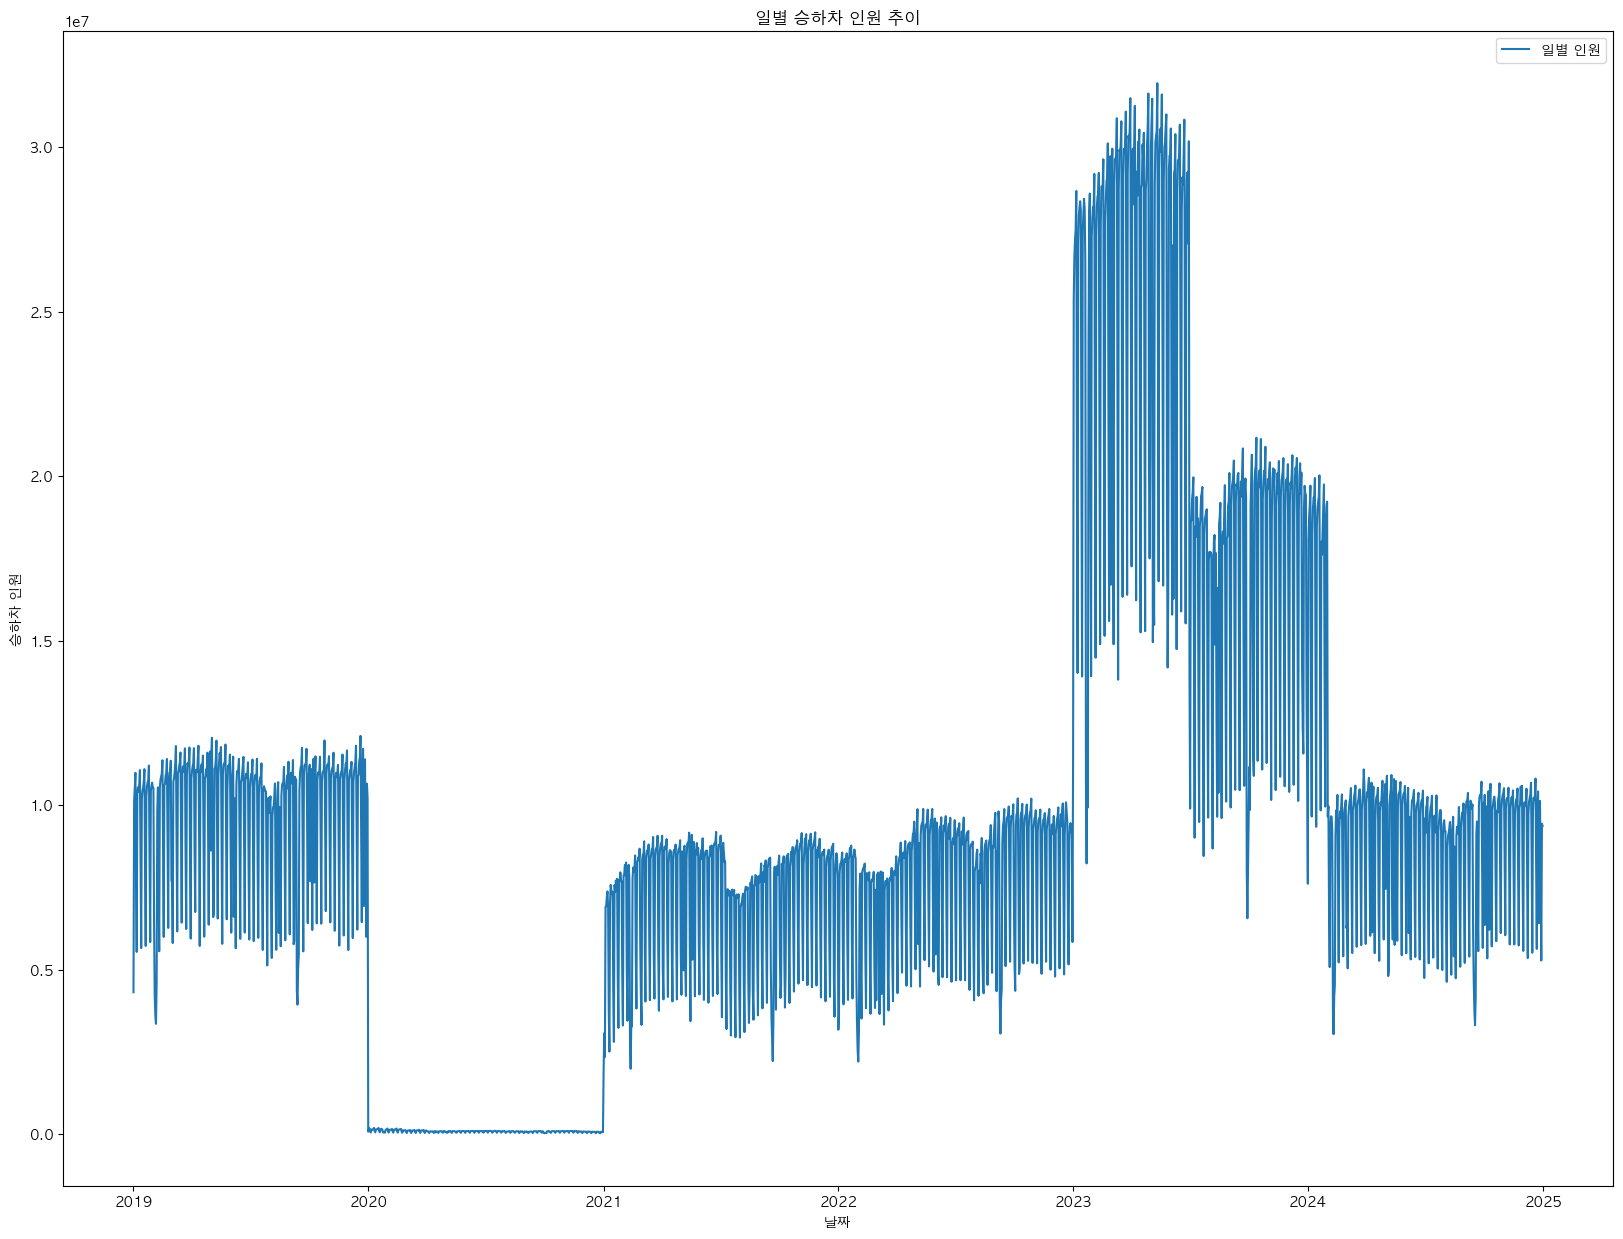

In [ ]:
daily_counts = df.groupby('날짜')['합계'].sum().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.plot(daily_counts['날짜'], daily_counts['합계'], label='일별 인원')
plt.xlabel('날짜')
plt.ylabel('승하차 인원')
plt.title('일별 승하차 인원 추이')
plt.legend()
plt.show()

In [28]:
daily_counts

,날짜,합계
0,2019-01-01,4312350.0
1,2019-01-02,10134974.0
2,2019-01-03,10508422.0
3,2019-01-04,10981933.0
4,2019-01-05,7839964.0
...,...,...
2187,2024-12-27,10127423.0
2188,2024-12-28,7520790.0
2189,2024-12-29,5276308.0
2190,2024-12-30,9438211.0


### 월별 승하차 인원

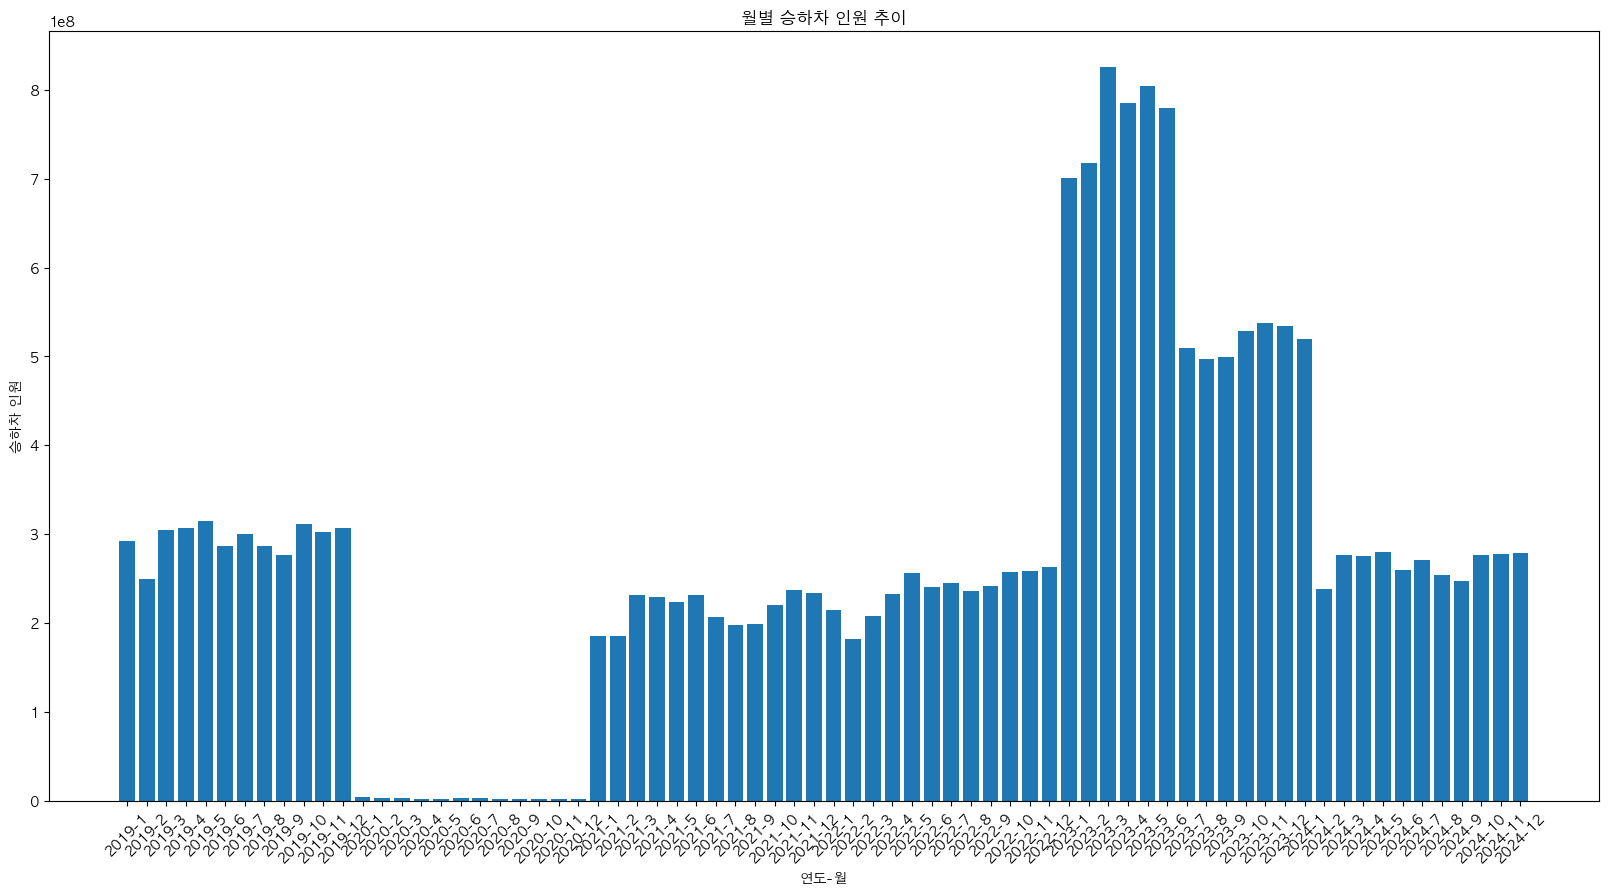

In [ ]:
monthly_counts = df.groupby(['연도', '월'])['합계'].sum().reset_index()

monthly_counts['연도-월'] = monthly_counts['연도'].astype(str) + '-' + monthly_counts['월'].astype(str)

plt.figure(figsize=(20,10))
plt.bar(monthly_counts['연도-월'], monthly_counts['합계'])
plt.xticks(rotation=45)
plt.xlabel('연도-월')
plt.ylabel('승하차 인원')
plt.title('월별 승하차 인원 추이')
plt.show()

In [27]:
monthly_counts

,연도,월,합계,연도-월
0,2019,1,292689642.0,2019-1
1,2019,2,249323330.0,2019-2
2,2019,3,304589016.0,2019-3
3,2019,4,306816128.0,2019-4
4,2019,5,315308633.0,2019-5
...,...,...,...,...
67,2024,8,254353648.0,2024-8
68,2024,9,246720710.0,2024-9
69,2024,10,276793976.0,2024-10
70,2024,11,277220526.0,2024-11


### 연도별 승하차 인원

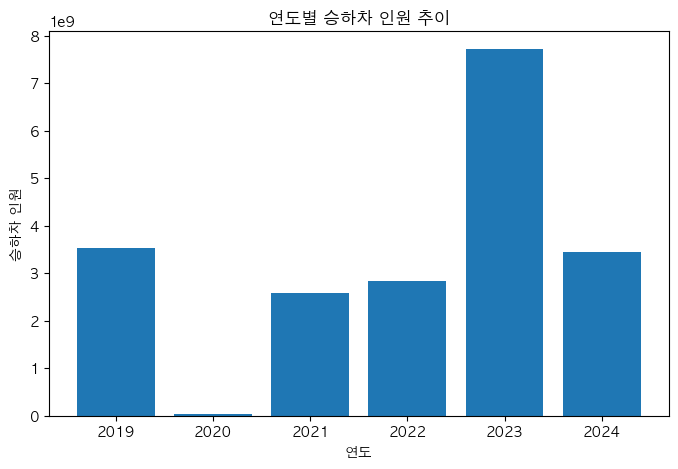

In [ ]:
yearly_counts = df.groupby('연도')['합계'].sum().reset_index()

plt.figure(figsize=(8,5))
plt.bar(yearly_counts['연도'].astype(str), yearly_counts['합계'])
plt.xlabel('연도')
plt.ylabel('승하차 인원')
plt.title('연도별 승하차 인원 추이')
plt.show()

In [30]:
yearly_counts

,연도,합계
0,2019,3.539032e+09
1,2020,3.028184e+07
2,2021,2.581848e+09
3,2022,2.835350e+09
4,2023,7.718970e+09
5,2024,3.453388e+09


### 평일과 주말 승하차 인원 비교

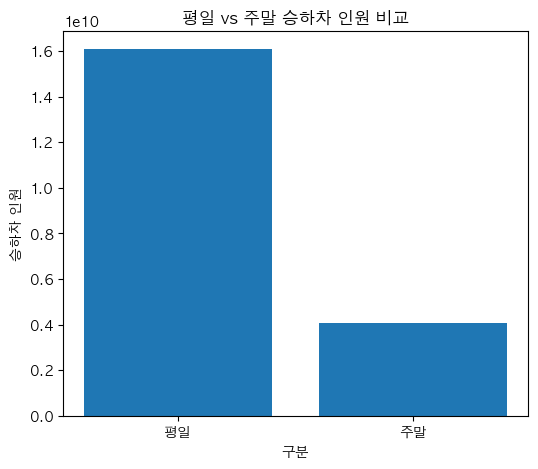

In [ ]:
def is_weekend(weekday):
    return weekday in ['토요일', '일요일']

df['주말여부'] = df['요일'].apply(is_weekend)

weekday_weekend = df.groupby('주말여부')['합계'].sum().reset_index()
weekday_weekend['구분'] = weekday_weekend['주말여부'].map({True: '주말', False: '평일'})

plt.figure(figsize=(6,5))
plt.bar(weekday_weekend['구분'], weekday_weekend['합계'])
plt.xlabel('구분')
plt.ylabel('승하차 인원')
plt.title('평일 vs 주말 승하차 인원 비교')
plt.show()

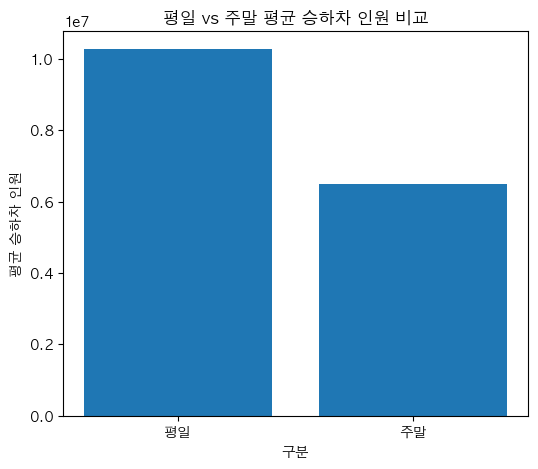

In [ ]:
import matplotlib.pyplot as plt

df_daily = df.groupby(['날짜', '주말여부'])['합계'].sum().reset_index()

weekday_weekend_avg = df_daily.groupby('주말여부')['합계'].mean().reset_index()

weekday_weekend_avg['구분'] = weekday_weekend_avg['주말여부'].map({True: '주말', False: '평일'})

plt.figure(figsize=(6,5))
plt.bar(weekday_weekend_avg['구분'], weekday_weekend_avg['합계'])
plt.xlabel('구분')
plt.ylabel('평균 승하차 인원')
plt.title('평일 vs 주말 평균 승하차 인원 비교')
plt.show()

### 계절별 승하차 인원 

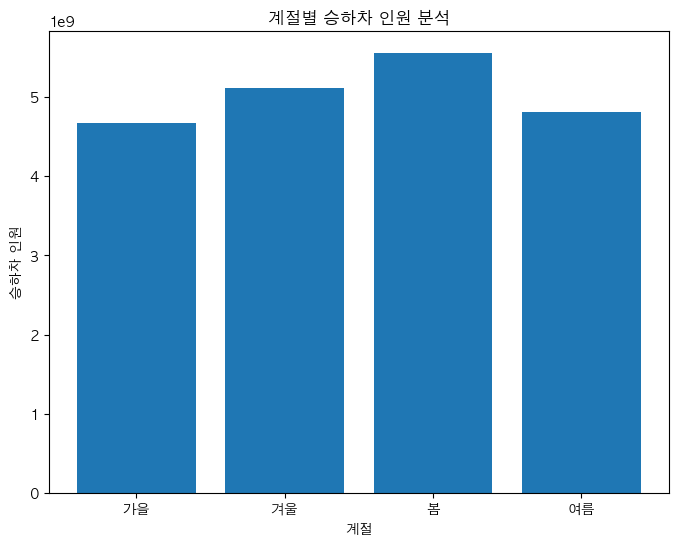

In [40]:
def month_to_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

df['계절'] = df['월'].apply(month_to_season)

seasonal_counts = df.groupby('계절')['합계'].sum().reset_index()

plt.figure(figsize=(8,6))
plt.bar(seasonal_counts['계절'], seasonal_counts['합계'])
plt.xlabel('계절')
plt.ylabel('승하차 인원')
plt.title('계절별 승하차 인원 분석')
plt.show()

### 코로나 전후 승하차 인원

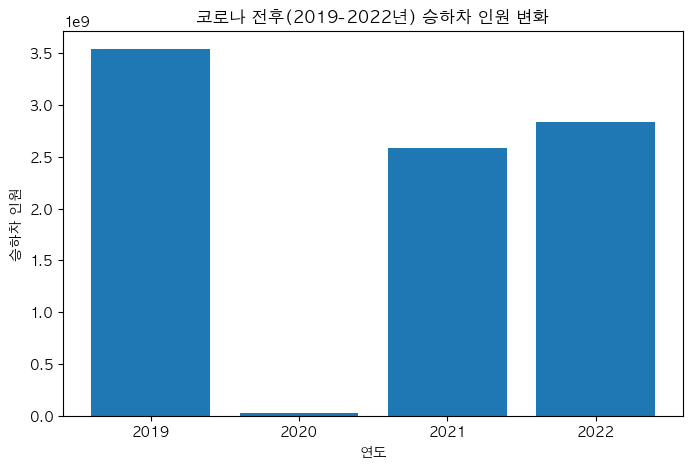

In [ ]:
# 코로나
covid_period = df[df['연도'].isin([2019, 2020, 2021, 2022])]
covid_yearly = covid_period.groupby('연도')['합계'].sum().reset_index()

plt.figure(figsize=(8,5))
plt.bar(covid_yearly['연도'].astype(str), covid_yearly['합계'])
plt.xlabel('연도')
plt.ylabel('승하차 인원')
plt.title('코로나 전후(2019-2022년) 승하차 인원 변화')
plt.show()

### 계절 별 평일 주말 승하차 인원

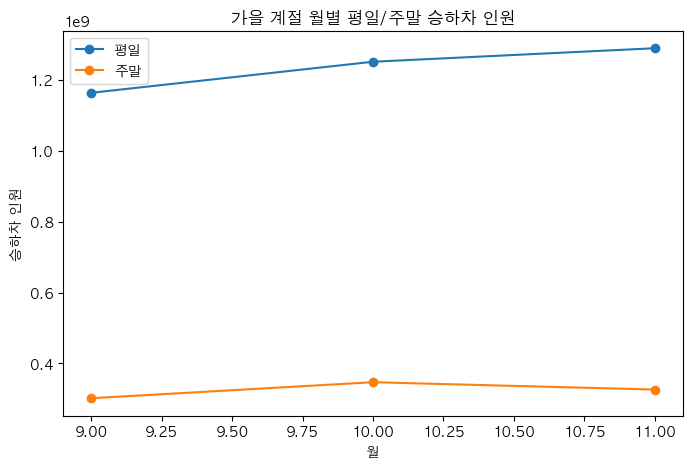

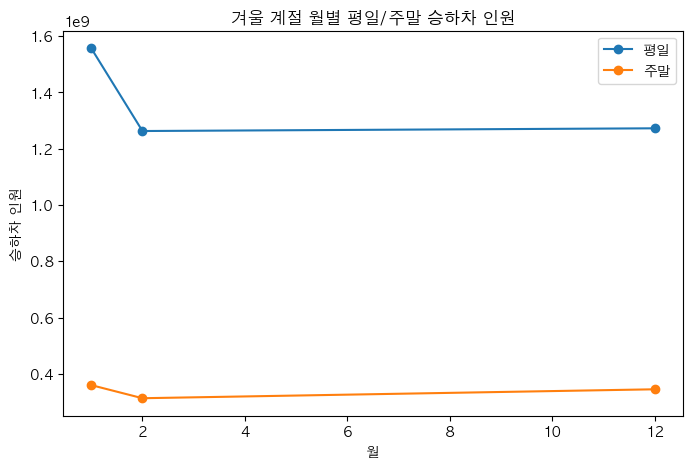

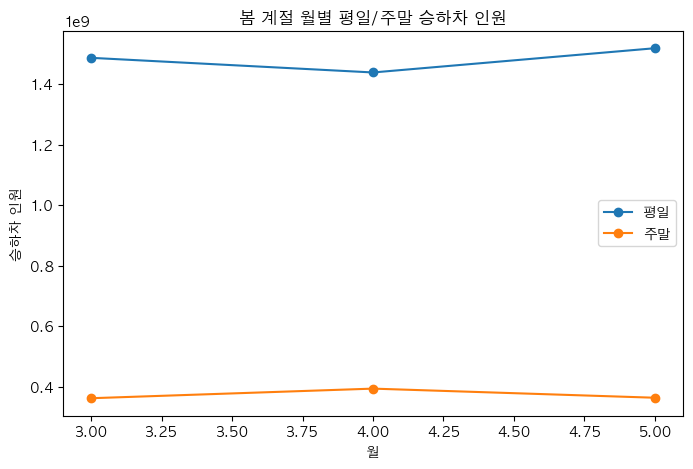

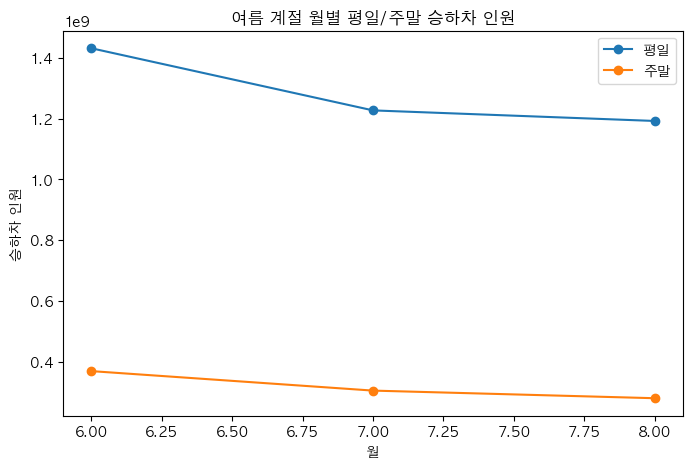

In [ ]:
# 계절별로 평일과 주말에 따른 월별 승하차 인원 합계
def month_to_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

df['계절'] = df['월'].apply(month_to_season)

def is_weekend(weekday):
    return weekday in ['토요일', '일요일']

df['주말여부'] = df['요일'].apply(is_weekend)

grouped = df.groupby(['계절', '월', '주말여부'])['합계'].sum().reset_index()

seasons = grouped['계절'].unique()
for season in seasons:
    sub_df = grouped[grouped['계절'] == season]
    plt.figure(figsize=(8,5))
    temp_weekday = sub_df[sub_df['주말여부'] == False]
    plt.plot(temp_weekday['월'], temp_weekday['합계'], marker='o', label='평일')
    temp_weekend = sub_df[sub_df['주말여부'] == True]
    plt.plot(temp_weekend['월'], temp_weekend['합계'], marker='o', label='주말')
    
    plt.xlabel('월')
    plt.ylabel('승하차 인원')
    plt.title(f'{season} 계절 월별 평일/주말 승하차 인원')
    plt.legend()
    plt.show()

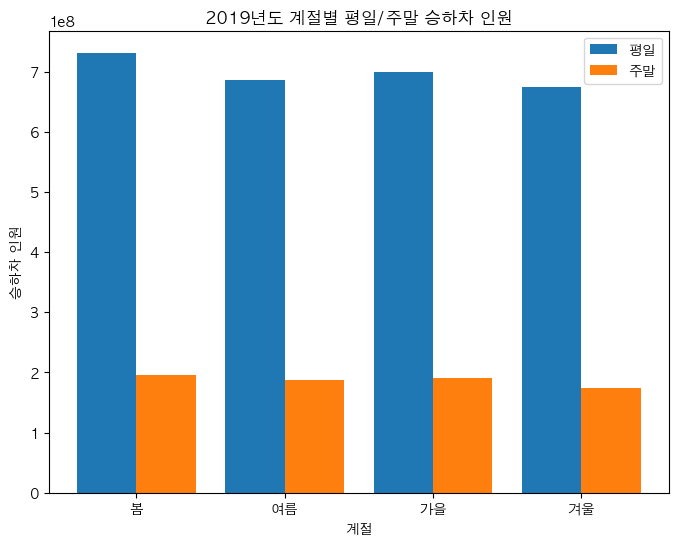

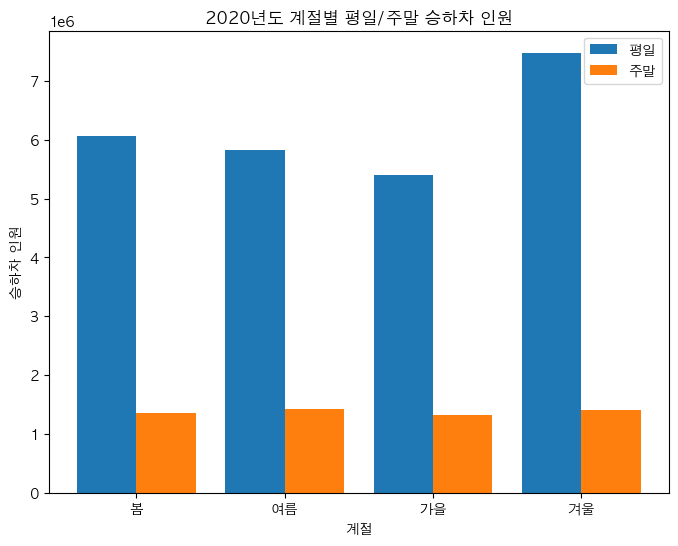

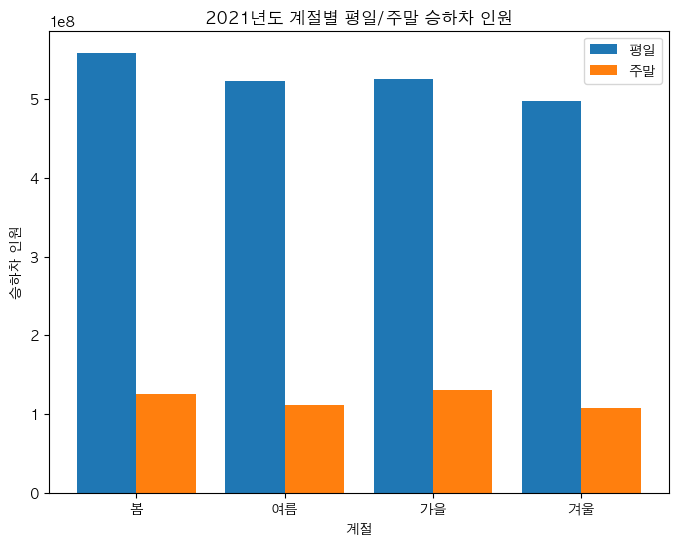

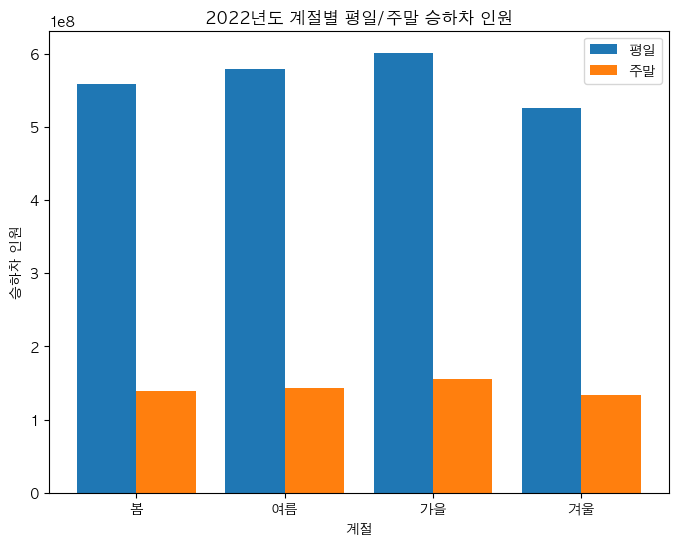

In [ ]:
# 코로나 영향 전후 2019년부터 2022년
covid_years = [2019, 2020, 2021, 2022]

for year in covid_years:
    df_year = df[df['연도'] == year]
    pivot_table = df_year.pivot_table(index='계절', columns='주말여부', values='합계', aggfunc='sum').reset_index()
    #  False -> 평일, True -> 주말
    pivot_table = pivot_table.rename(columns={False:'평일', True:'주말'})
    
    season_order = ['봄', '여름', '가을', '겨울']
    pivot_table['계절'] = pd.Categorical(pivot_table['계절'], categories=season_order, ordered=True)
    pivot_table.sort_values('계절', inplace=True)
    
    plt.figure(figsize=(8,6))
    x = range(len(pivot_table))
    plt.bar([p - 0.2 for p in x], pivot_table['평일'], width=0.4, label='평일')
    plt.bar([p + 0.2 for p in x], pivot_table['주말'], width=0.4, label='주말')
    plt.xticks(x, pivot_table['계절'])
    plt.xlabel('계절')
    plt.ylabel('승하차 인원')
    plt.title(f'{year}년도 계절별 평일/주말 승하차 인원')
    plt.legend()
    plt.show()

### 호선별 승하차 인원

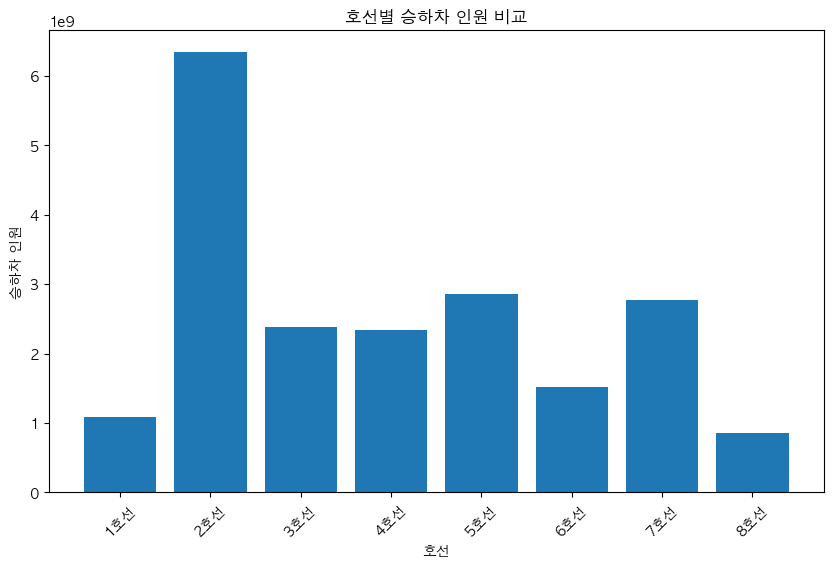

In [ ]:
line_counts = df.groupby('호선')['합계'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.bar(line_counts['호선'], line_counts['합계'])
plt.xlabel('호선')
plt.ylabel('승하차 인원')
plt.title('호선별 승하차 인원 비교')
plt.xticks(rotation=45)
plt.show()

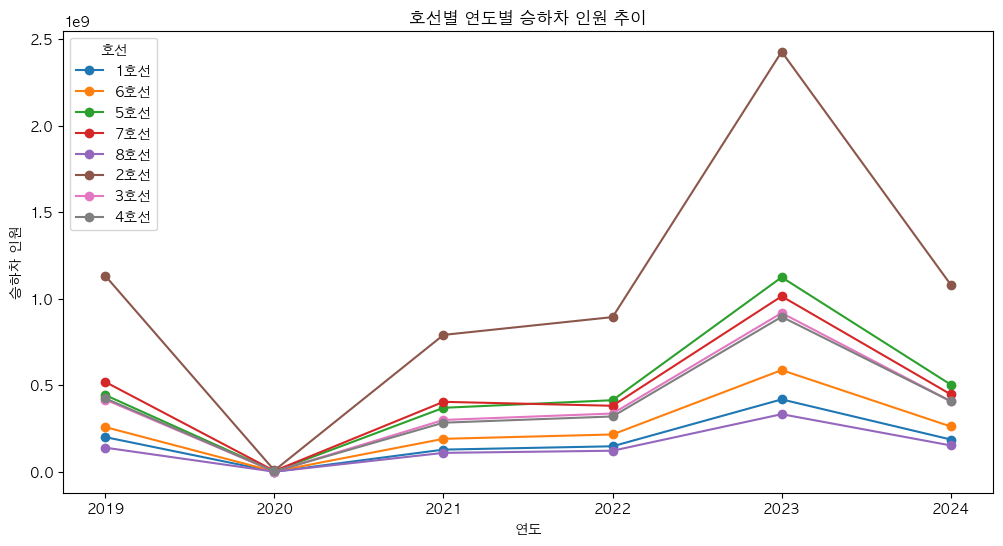

In [ ]:
unique_lines = df['호선'].unique()

plt.figure(figsize=(12,6))
for line in unique_lines:
    df_line = df[df['호선'] == line]
    yearly_sum = df_line.groupby('연도')['합계'].sum().reset_index()
    plt.plot(yearly_sum['연도'], yearly_sum['합계'], marker='o', label=line)

plt.xlabel('연도')
plt.ylabel('승하차 인원')
plt.title('호선별 연도별 승하차 인원 추이')
plt.legend(title='호선')
plt.show()

### 시간별 승하차 인원

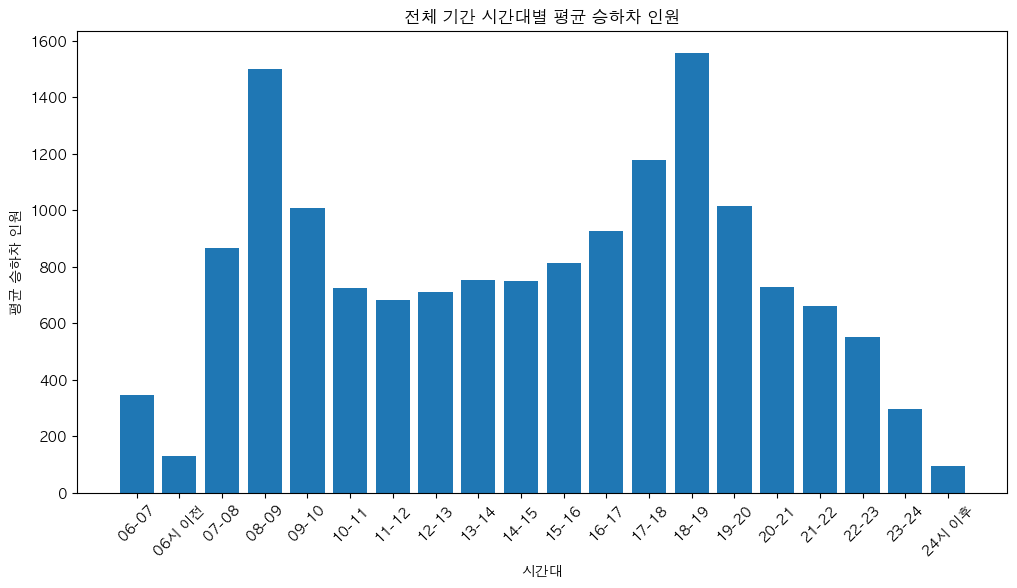

In [ ]:
time_columns = ['06시 이전', '06-07', '07-08', '08-09', '09-10', 
                '10-11', '11-12', '12-13', '13-14', '14-15', 
                '15-16', '16-17', '17-18', '18-19', '19-20', 
                '20-21', '21-22', '22-23', '23-24', '24시 이후']

df_long = df.melt(id_vars=['날짜'], value_vars=time_columns, 
                  var_name='시간대', value_name='인원')

time_slot_summary = df_long.groupby('시간대')['인원'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.bar(time_slot_summary['시간대'], time_slot_summary['인원'])
plt.xlabel('시간대')
plt.ylabel('평균 승하차 인원')
plt.title('전체 기간 시간대별 평균 승하차 인원')
plt.xticks(rotation=45)
plt.show()

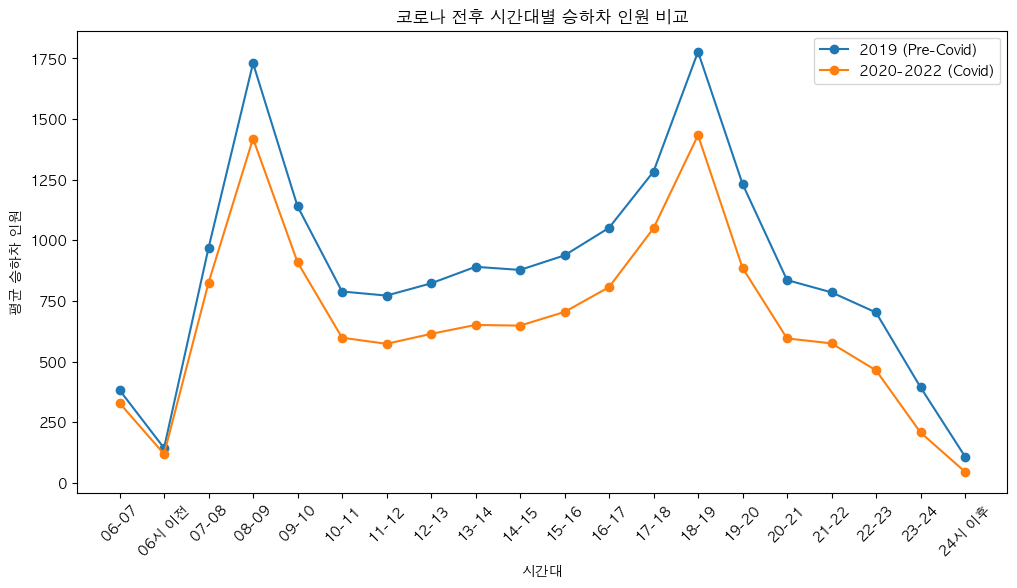

In [ ]:

df_pre = df[df['연도'] == 2019]
df_covid = df[df['연도'].isin([2020, 2021, 2022])]

df_long_pre = df_pre.melt(id_vars=['날짜'], value_vars=time_columns,
                          var_name='시간대', value_name='인원')
df_long_covid = df_covid.melt(id_vars=['날짜'], value_vars=time_columns,
                              var_name='시간대', value_name='인원')

summary_pre = df_long_pre.groupby('시간대')['인원'].mean().reset_index()
summary_covid = df_long_covid.groupby('시간대')['인원'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(summary_pre['시간대'], summary_pre['인원'], marker='o', label='2019 (Pre-Covid)')
plt.plot(summary_covid['시간대'], summary_covid['인원'], marker='o', label='2020-2022 (Covid)')
plt.xlabel('시간대')
plt.ylabel('평균 승하차 인원')
plt.title('코로나 전후 시간대별 승하차 인원 비교')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# EDA _ 역 간 비교 & 노선별 특징

### 가장 이용자가 많은 상위 10개역

           역명           합계
207  잠실(송파구청)  431162070.0
2          강남  368394005.0
250      홍대입구  325618029.0
112        사당  306174885.0
129       서울역  302951201.0
16      고속터미널  302023989.0
153        신림  265935621.0
24    구로디지털단지  257928160.0
11       건대입구  243975492.0
116  삼성(무역센터)  241448408.0


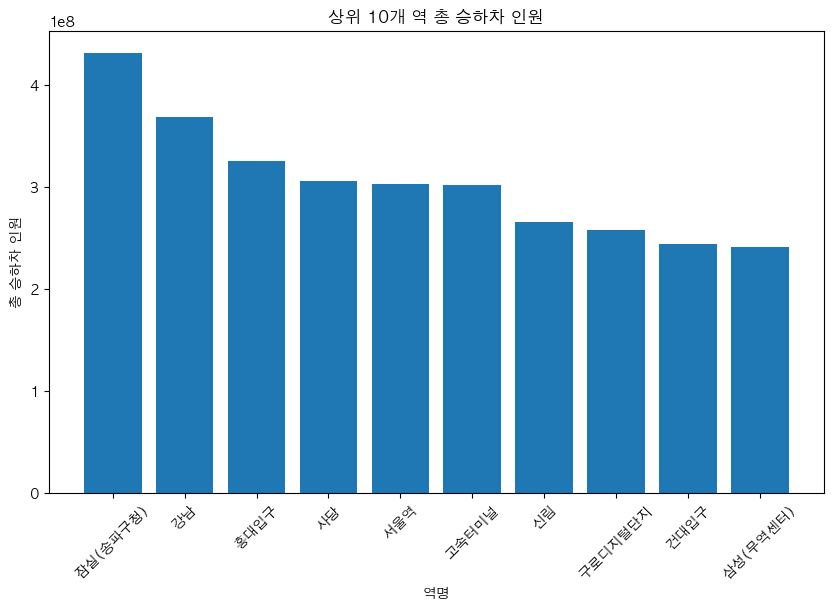

In [ ]:
top_stations = df.groupby('역명')['합계'].sum().reset_index()

top_stations = top_stations.sort_values('합계', ascending=False).head(10)
print(top_stations)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(top_stations['역명'], top_stations['합계'])
plt.xlabel('역명')
plt.ylabel('총 승하차 인원')
plt.title('상위 10개 역 총 승하차 인원')
plt.xticks(rotation=45)
plt.show()

### 호선 별 승하차 인원

    호선            합계
1  2호선  6.334096e+09
4  5호선  2.861040e+09
6  7호선  2.774843e+09
2  3호선  2.384355e+09
3  4호선  2.337210e+09
5  6호선  1.520257e+09
0  1호선  1.085915e+09
7  8호선  8.611531e+08


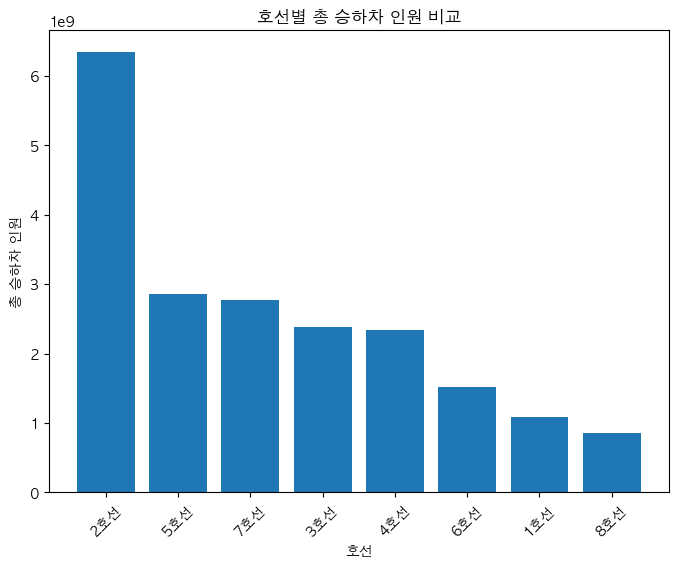

In [51]:
line_usage = df.groupby('호선')['합계'].sum().reset_index()
line_usage = line_usage.sort_values('합계', ascending=False)
print(line_usage)

plt.figure(figsize=(8,6))
plt.bar(line_usage['호선'], line_usage['합계'])
plt.xlabel('호선')
plt.ylabel('총 승하차 인원')
plt.title('호선별 총 승하차 인원 비교')
plt.xticks(rotation=45)
plt.show()

### 노선별 러시아워 집중도

    호선  rush_morning  rush_evening       offpeak    rush_total  rush_ratio
0  1호선   140289400.0  1.638659e+08  3.926844e+08  3.041553e+08    0.774554
1  2호선   917412115.0  1.106325e+09  1.773181e+09  2.023737e+09    1.141303
2  3호선   347167902.0  3.908400e+08  7.405752e+08  7.380079e+08    0.996533
3  4호선   325314782.0  3.766786e+08  7.256869e+08  7.019934e+08    0.967350
4  5호선   511648425.0  4.901786e+08  7.821192e+08  1.001827e+09    1.280913
5  6호선   242546024.0  2.492403e+08  4.329861e+08  4.917863e+08    1.135802
6  7호선   479648866.0  4.668318e+08  7.547478e+08  9.464807e+08    1.254036
7  8호선   151291687.0  1.440692e+08  2.379341e+08  2.953609e+08    1.241356


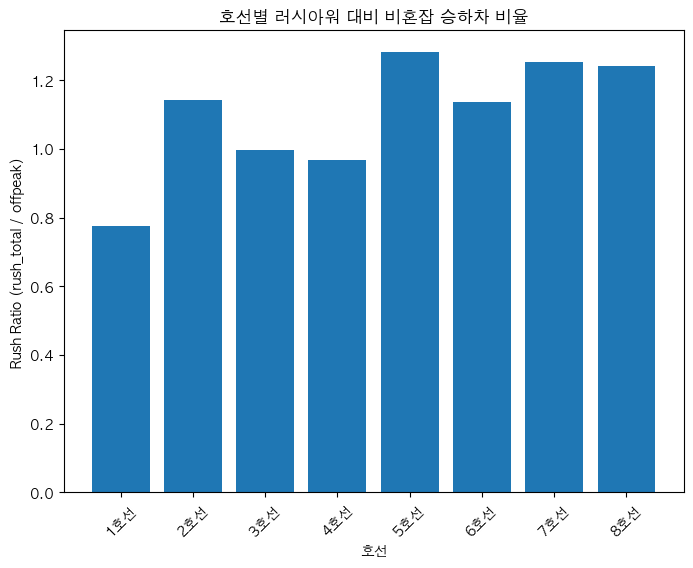

In [ ]:
morning_cols = ['07-08', '08-09']
evening_cols = ['18-19', '19-20']
offpeak_cols = ['10-11', '11-12', '12-13', '13-14', '14-15', '15-16']

df['rush_morning'] = df[morning_cols].sum(axis=1)
df['rush_evening'] = df[evening_cols].sum(axis=1)
df['offpeak'] = df[offpeak_cols].sum(axis=1)

df['rush_total'] = df['rush_morning'] + df['rush_evening']

line_rush = df.groupby('호선')[['rush_morning', 'rush_evening', 'offpeak']].sum().reset_index()
line_rush['rush_total'] = line_rush['rush_morning'] + line_rush['rush_evening']

line_rush['rush_ratio'] = line_rush['rush_total'] / line_rush['offpeak']
print(line_rush)

plt.figure(figsize=(8,6))
plt.bar(line_rush['호선'], line_rush['rush_ratio'])
plt.xlabel('호선')
plt.ylabel('Rush Ratio (rush_total / offpeak)')
plt.title('호선별 러시아워 대비 비혼잡 승하차 비율')
plt.xticks(rotation=45)
plt.show()

### 출퇴근 시간대 vs 비혼잡 시간대 승하차 패턴 비교

In [55]:
	# •	출퇴근 시간대:
	# •	오전: “07-08”과 “08-09”
	# •	오후: “18-19”와 “19-20”
	# •	비혼잡 시간대:
	# •	“10-11”, “11-12”, “12-13”, “13-14”, “14-15”, “15-16”

#### 전체 기간 기준

출퇴근 시간대 하루 평균 승하차 인원: 2966855.929288321
비혼잡 시간대 하루 평균 승하차 인원: 2664194.4849452553


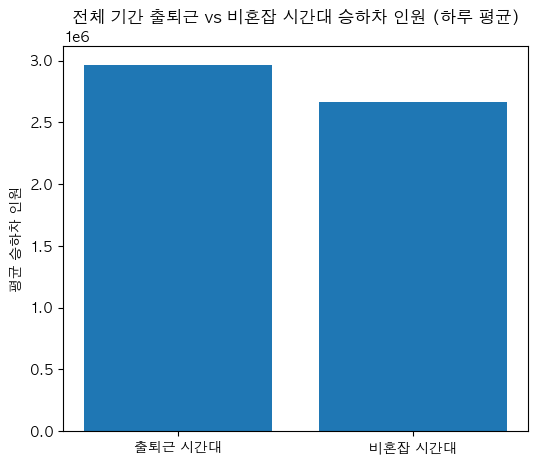

In [ ]:
daily_time = df.groupby('날짜').agg({
    'rush_morning': 'sum', 
    'rush_evening': 'sum', 
    'offpeak': 'sum'
}).reset_index()

daily_time['rush_total'] = daily_time['rush_morning'] + daily_time['rush_evening']

avg_rush = daily_time['rush_total'].mean()
avg_offpeak = daily_time['offpeak'].mean()

print("출퇴근 시간대 하루 평균 승하차 인원:", avg_rush)
print("비혼잡 시간대 하루 평균 승하차 인원:", avg_offpeak)

plt.figure(figsize=(6,5))
plt.bar(['출퇴근 시간대', '비혼잡 시간대'], [avg_rush, avg_offpeak])
plt.ylabel('평균 승하차 인원')
plt.title('전체 기간 출퇴근 vs 비혼잡 시간대 승하차 인원 (하루 평균)')
plt.show()

#### 상위 10개역

           역명  rush_morning  rush_evening      offpeak   rush_total
207  잠실(송파구청)    50723860.0    75472959.0  129490989.0  126196819.0
2          강남    42662690.0    66417786.0  103960972.0  109080476.0
24    구로디지털단지    48507331.0    47989977.0   59232598.0   96497308.0
129       서울역    44070626.0    50100808.0   94056984.0   94171434.0
112        사당    39102419.0    54115687.0   83473540.0   93218106.0
153        신림    42888649.0    45160278.0   67096708.0   88048927.0
144        시청    42644824.0    40218090.0   57420534.0   82862914.0
116  삼성(무역센터)    37591685.0    44018886.0   67986821.0   81610571.0
179        역삼    40243398.0    40583224.0   56185744.0   80826622.0
250      홍대입구    21810729.0    58245318.0   99419820.0   80056047.0


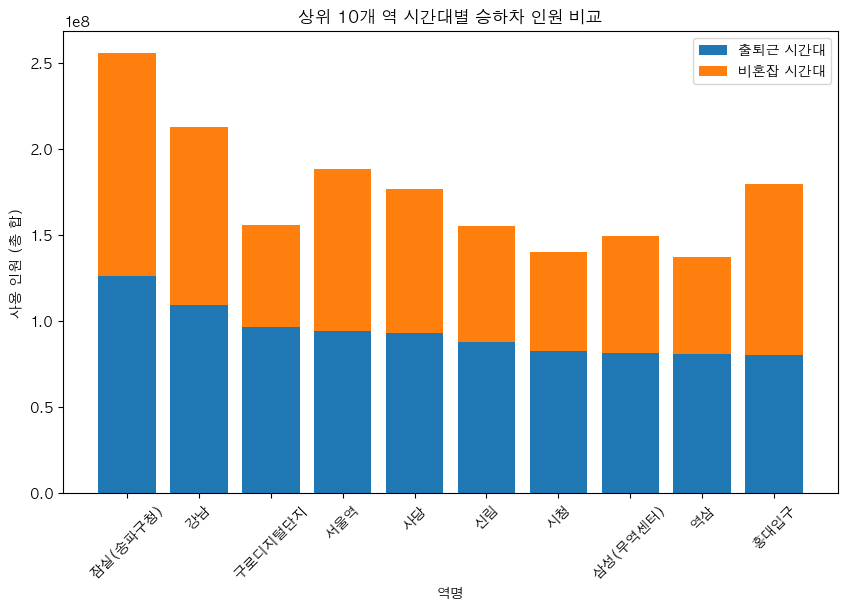

In [ ]:
station_time = df.groupby('역명')[['rush_morning', 'rush_evening', 'offpeak']].sum().reset_index()
station_time['rush_total'] = station_time['rush_morning'] + station_time['rush_evening']

top_station_time = station_time.sort_values('rush_total', ascending=False).head(10)
print(top_station_time)

plt.figure(figsize=(10,6))
plt.bar(top_station_time['역명'], top_station_time['rush_total'], label='출퇴근 시간대')
plt.bar(top_station_time['역명'], top_station_time['offpeak'], 
        bottom=top_station_time['rush_total'], label='비혼잡 시간대')
plt.xlabel('역명')
plt.ylabel('사용 인원 (총 합)')
plt.title('상위 10개 역 시간대별 승하차 인원 비교')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# EDA _ 시간대/요일별 패턴 분석

#### 요일별 승하차 인원 차이 및 금요일 저녁 혼잡 역 분석

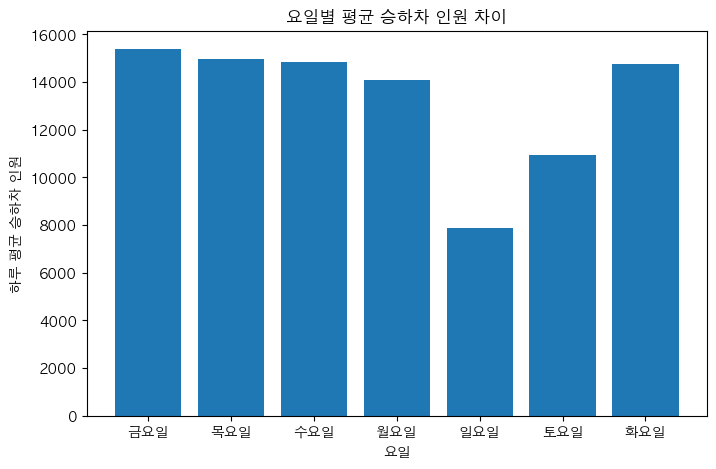

/var/folders/0k/b89zvlt92ls3p_60v_0kh9g00000gn/T/ipykernel_76186/706710054.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_friday['금요일_저녁'] = df_friday[evening_cols].sum(axis=1)


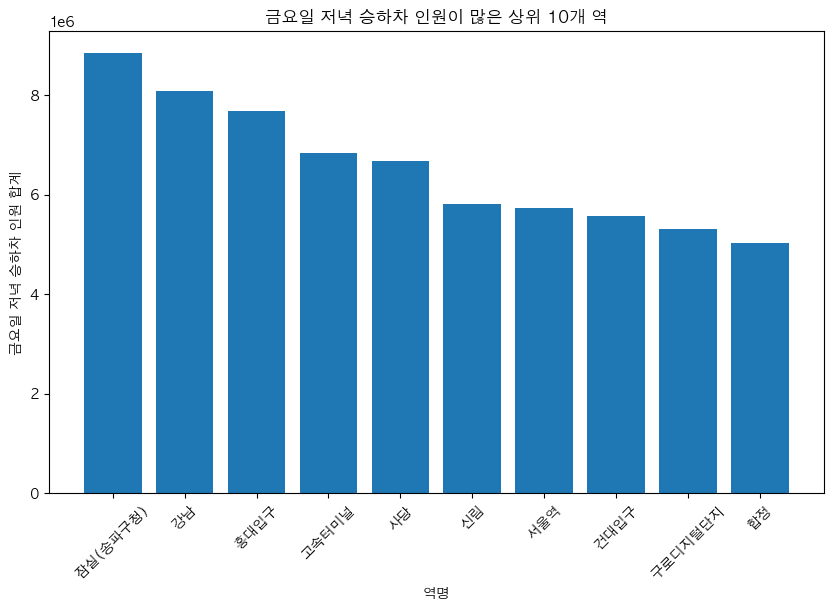

In [ ]:
weekday_summary = df.groupby('요일')['합계'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.bar(weekday_summary['요일'], weekday_summary['합계'])
plt.xlabel('요일')
plt.ylabel('하루 평균 승하차 인원')
plt.title('요일별 평균 승하차 인원 차이')
plt.show()


df_friday = df[df['요일'] == '금요일']

evening_cols = ['19-20', '20-21'] 
df_friday['금요일_저녁'] = df_friday[evening_cols].sum(axis=1)

friday_evening_summary = df_friday.groupby('역명')['금요일_저녁'].sum().reset_index()
top_friday_stations = friday_evening_summary.sort_values('금요일_저녁', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_friday_stations['역명'], top_friday_stations['금요일_저녁'])
plt.xlabel('역명')
plt.ylabel('금요일 저녁 승하차 인원 합계')
plt.title('금요일 저녁 승하차 인원이 많은 상위 10개 역')
plt.xticks(rotation=45)
plt.show()

#### 시간대별 혼잡도 히트맵 (Rows=시간, Columns=요일)

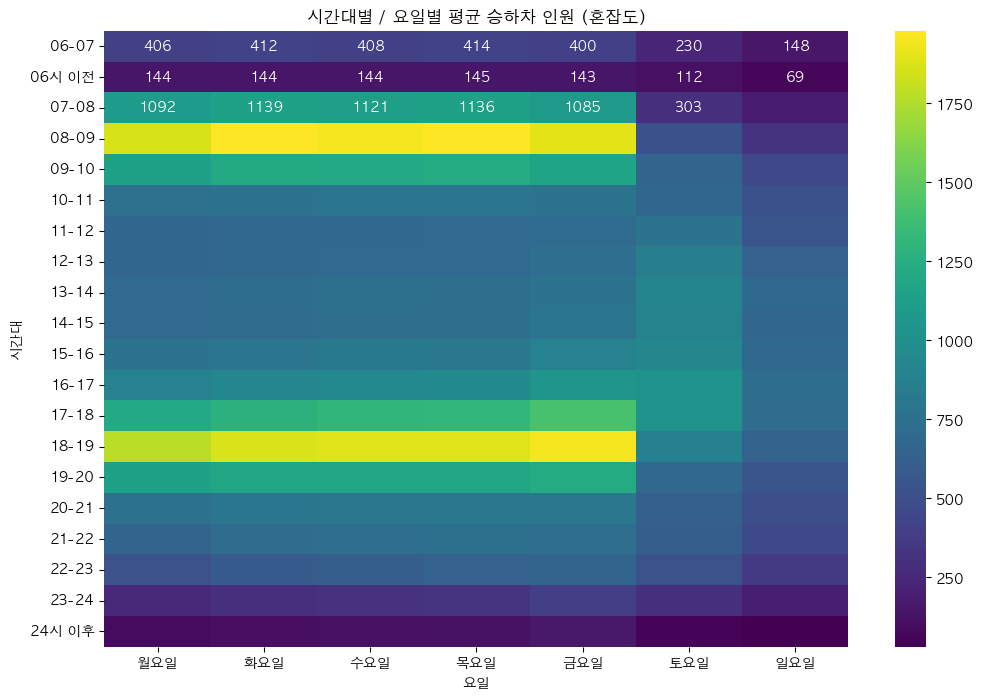

In [ ]:
time_columns = ['06시 이전', '06-07', '07-08', '08-09', '09-10', 
                '10-11', '11-12', '12-13', '13-14', '14-15', 
                '15-16', '16-17', '17-18', '18-19', '19-20', 
                '20-21', '21-22', '22-23', '23-24', '24시 이후']

desired_days = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']

df_melted = df.melt(
    id_vars=['날짜','요일'], 
    value_vars=time_columns, 
    var_name='시간대', 
    value_name='인원'
)

df_melted['요일'] = pd.Categorical(df_melted['요일'], 
                                   categories=desired_days, 
                                   ordered=True)

heatmap_data = df_melted.pivot_table(
    index='시간대', 
    columns='요일', 
    values='인원', 
    aggfunc='mean'
)

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='viridis')
plt.xlabel('요일')
plt.ylabel('시간대')
plt.title('시간대별 / 요일별 평균 승하차 인원 (혼잡도)')
plt.show()

# EDA - 시간대별 승하차 추이 시각화

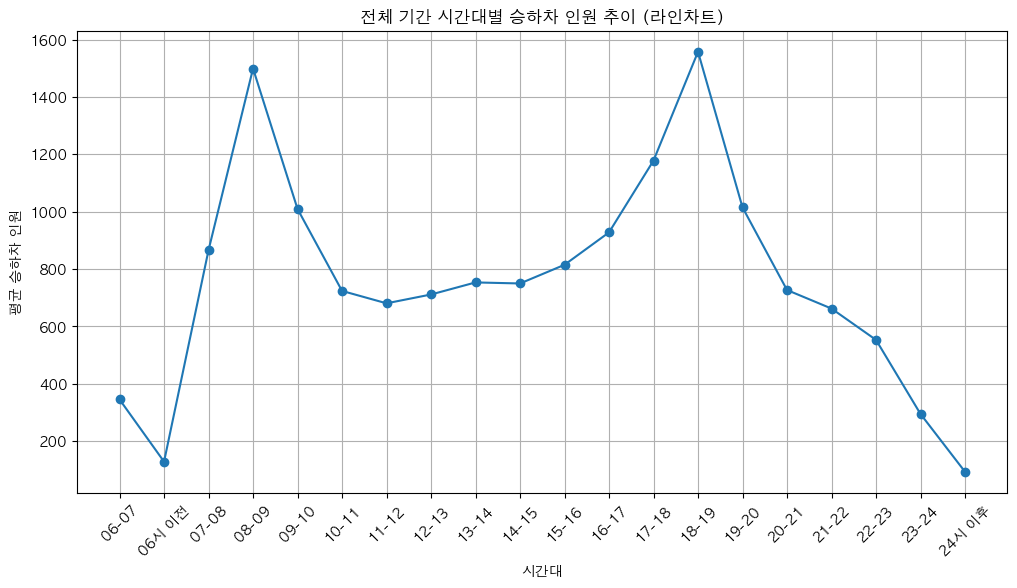

In [ ]:
time_columns = ['06시 이전', '06-07', '07-08', '08-09', '09-10', 
                '10-11', '11-12', '12-13', '13-14', '14-15', 
                '15-16', '16-17', '17-18', '18-19', '19-20', 
                '20-21', '21-22', '22-23', '23-24', '24시 이후']

df['날짜'] = pd.to_datetime(df['날짜'])

df_long = df.melt(id_vars=['날짜'], value_vars=time_columns, 
                  var_name='시간대', value_name='인원')

time_slot_mean = df_long.groupby('시간대')['인원'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(time_slot_mean['시간대'], time_slot_mean['인원'], marker='o')
plt.xlabel('시간대')
plt.ylabel('평균 승하차 인원')
plt.title('전체 기간 시간대별 승하차 인원 추이 (라인차트)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

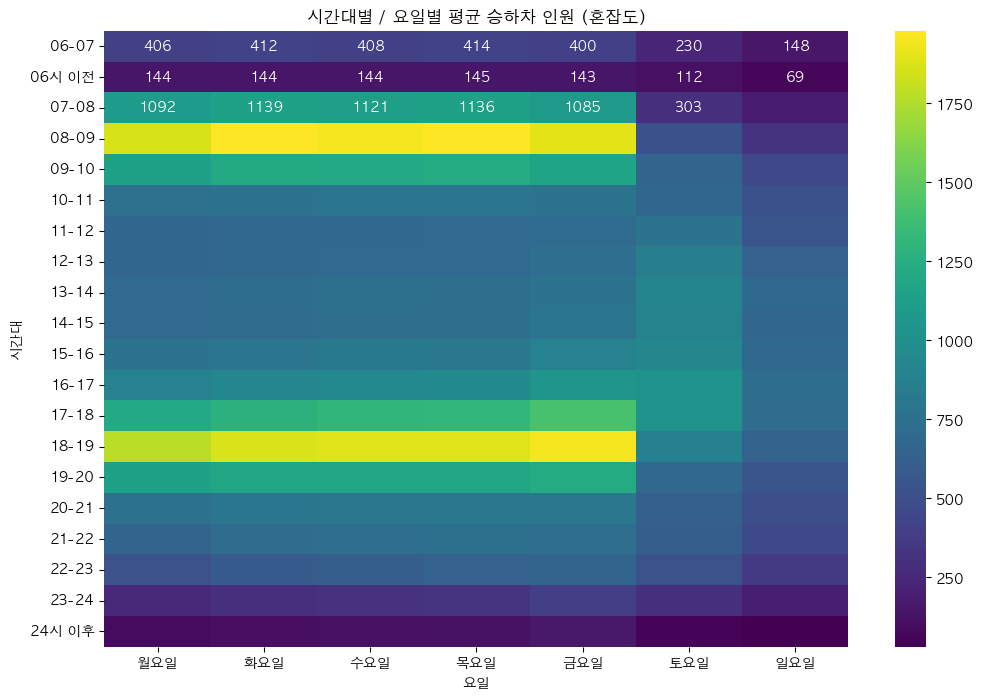

In [ ]:

df_melted = df.melt(id_vars=['날짜', '요일'], value_vars=time_columns, 
                    var_name='시간대', value_name='인원')

desired_days = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
df_melted['요일'] = pd.Categorical(df_melted['요일'], categories=desired_days, ordered=True)

heatmap_data = df_melted.pivot_table(index='시간대', columns='요일', values='인원', aggfunc='mean')

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='viridis')
plt.xlabel('요일')
plt.ylabel('시간대')
plt.title('시간대별 / 요일별 평균 승하차 인원 (혼잡도)')
plt.show()

# EDA - 데이터 시각화

In [66]:
station_df=pd.read_csv('/Users/parkjisook/Desktop/공공데이터/서울시 역사마스터 정보.csv',encoding='cp949')

In [67]:
station_df.head()

,역사_ID,역사명,호선,위도,경도
0,9010,동탄,수도권 광역급행철도,37.20034,127.09569
1,9009,구성,수도권 광역급행철도,37.29913,127.10389
2,9008,성남,수도권 광역급행철도,37.39467,127.12058
3,9007,수서,수도권 광역급행철도,37.48637,127.10161
4,9006,삼성,수도권 광역급행철도,37.50887,127.06324


In [ ]:
import folium
import pandas as pd
import numpy as np
from branca.colormap import linear


station_usage = df.groupby('역명')['합계'].sum().reset_index()
station_usage.rename(columns={'합계':'총승하차'}, inplace=True)

station_map_data = pd.merge(station_df, station_usage, left_on='역사명', right_on='역명', how='inner')

center_lat = station_map_data['위도'].mean()
center_lon = station_map_data['경도'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

min_usage = station_map_data['총승하차'].min()
max_usage = station_map_data['총승하차'].max()

colormap = linear.YlOrRd_09.scale(min_usage, max_usage)
colormap.caption = '총 승하차 인원'

for idx, row in station_map_data.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=5 + (row['총승하차'] - min_usage) / (max_usage - min_usage) * 15,  # 반지름: 최소 5, 최대 약 20 정도
        color=colormap(row['총승하차']),
        fill=True,
        fill_color=colormap(row['총승하차']),
        fill_opacity=0.7,
        popup=folium.Popup(f"{row['역사명']}: {row['총승하차']:,}명", max_width=300)
    ).add_to(m)

colormap.add_to(m)

m.save("station_map.html")
m

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(
    station_map_data,
    lat="위도",
    lon="경도",
    hover_name="역사명",  
    hover_data=["총승하차"],
    size="총승하차", 
    color="총승하차",
    color_continuous_scale=px.colors.sequential.YlOrRd,
    size_max=30,
    zoom=11,
    mapbox_style="open-street-map" 
)
fig.update_layout(title="역 위치별 총 승하차 인원")
fig.show()

# 인사이트 도출

## 1. 어떤 역에 더 많은 출구나 편의시설이 필요한가?

- 승하차 인원 규모 
    1. 역별 전체 승하차 인원(또는 출입량)을 집계하여, 특히 평일과 피크타임에 높은 이용량을 보이는 역을 파악

- 파크 타임 집중도 분석
    1. 특정 시간대에 급증하는 승하차 인원을 살펴본다
    2. 하루 전체 인원과 피크 시간 인원을 비교하여, 하루 평균 인원보다 피크 시간대에 현저하게 높은 역은 단일 진입/출구 처리가 어려워 추가 출구 또는 편의시설 확장이 필요할 가능성이 크다


In [ ]:
station_usage = df.groupby('역명')['합계'].sum().reset_index()
station_usage.rename(columns={'합계':'총승하차'}, inplace=True)
top10_stations = station_usage.sort_values('총승하차', ascending=False).head(10)

In [72]:
station_usage

,역명,총승하차
0,가락시장,77887636.0
1,가산디지털단지,179634135.0
2,강남,368394005.0
3,강남구청,73543243.0
4,강동,82027820.0
...,...,...
251,홍제,80276192.0
252,화곡,125045220.0
253,화랑대(서울여대입구),48240993.0
254,회현(남대문시장),120806651.0


In [73]:
top10_stations

,역명,총승하차
207,잠실(송파구청),431162070.0
2,강남,368394005.0
250,홍대입구,325618029.0
112,사당,306174885.0
129,서울역,302951201.0
16,고속터미널,302023989.0
153,신림,265935621.0
24,구로디지털단지,257928160.0
11,건대입구,243975492.0
116,삼성(무역센터),241448408.0


In [ ]:

time_columns = ['06시 이전','06-07','07-08','08-09','09-10',
                '10-11','11-12','12-13','13-14','14-15',
                '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24','24시 이후']

peak_hours = ['07-08', '08-09', '18-19', '19-20']

top10_names = top10_stations['역명'].tolist()

peak_summary_list = []
for station in top10_names:
    station_data = df[df['역명'] == station]
    station_data_long = station_data.melt(id_vars=['날짜'], 
                                           value_vars=time_columns, 
                                           var_name='시간대', 
                                           value_name='인원')
    station_peak = station_data_long[station_data_long['시간대'].isin(peak_hours)]
    avg_usage = station_peak.groupby('시간대')['인원'].mean().reset_index()
    avg_usage['역명'] = station  # 어느 역의 데이터인지 표시
    peak_summary_list.append(avg_usage)

result_peak_summary = pd.concat(peak_summary_list, ignore_index=True)

result_peak_summary

,시간대,인원,역명
0,07-08,1857.098315,잠실(송파구청)
1,08-09,3420.040678,잠실(송파구청)
2,18-19,4685.079172,잠실(송파구청)
3,19-20,3166.872451,잠실(송파구청)
4,07-08,2993.474615,강남
5,08-09,5883.489596,강남
6,18-19,8334.910737,강남
7,19-20,5484.853308,강남
8,07-08,1586.998752,홍대입구
9,08-09,2951.230337,홍대입구


In [81]:
top10_result = result_peak_summary.pivot(index='역명', columns='시간대', values='인원').reset_index()
top10_result

시간대,역명,07-08,08-09,18-19,19-20
0,강남,2993.474615,5883.489596,8334.910737,5484.853308
1,건대입구,874.815127,1697.070537,2629.268623,1914.692988
2,고속터미널,970.695277,1537.839471,2763.273512,2073.816167
3,구로디지털단지,3445.367873,6647.709738,6045.663337,3939.766750
4,사당,1711.151581,2356.931960,3315.246567,2314.766646
5,삼성(무역센터),2300.952975,5520.870787,5875.998127,3283.154182
6,서울역,1521.988244,3062.970766,3284.092385,1928.226384
7,신림,3543.697253,5380.282980,5087.222222,4309.423221
8,잠실(송파구청),1857.098315,3420.040678,4685.079172,3166.872451
9,홍대입구,1586.998752,2951.230337,6806.509988,5312.782147


## 2. 혼잡한 구간(역간 이동)에 대한 대책

- 역간 이동 데이터 활용
    1. 개별 역의 승하차 인원만 제공할 수 있으나, 인접역(같은 호선의 연속된 역)의 승하차 인원이 모두 매우 높다면, 해당 구간에서 승객들이 빠르게 이동하지 못하거나 혼잡현상 발생할 수 있다

- 호선별 피크 시간 분석
    1. 각 호선에서 시간대별 승하차 패턴을 분석하여, 특정 구간에서의 인원 집중도를 파악
    2. 예를 들어, 출근/퇴근 시간에 한 호선의 특정 구간에서 인원이 몰리는 경우, 해당 구간에 임시 출구 확장, 증설 열차 운행 등 대책을 검토

In [ ]:

line_usage = df.groupby('호선')['합계'].sum().reset_index()
df['rush_total'] = df[['07-08','08-09','18-19','19-20']].sum(axis=1)
line_rush = df.groupby('호선')['rush_total'].sum().reset_index()


In [ ]:
line_rush

,호선,rush_total
0,1호선,3.041553e+08
1,2호선,2.023737e+09
2,3호선,7.380079e+08
3,4호선,7.019934e+08
4,5호선,1.001827e+09
5,6호선,4.917863e+08
6,7호선,9.464807e+08
7,8호선,2.953609e+08


## 3. 지하철 광고업 또는 편의시설 입점 전략 수립 시 어떤 역이 타겟이 될 수 있는가

- 승하차 인원 및 체류 시간:
	1. 총 승하차 인원뿐 아니라, 각 역에서 대기하거나 이동하는 시간이 길어 광고 노출 효과가 높은 역(예: 환승역, 혼잡 역)을 식별할 수 있습니다.
	2. 시간대별 인원 분포 분석을 통해 사람들이 머무는 시간이 긴 구간을 파악합니다.

- 인접 지역의 상권 및 인구구성:
	1. 역 주변의 인구 밀도, 상업 시설, 대기업 또는 유동 인구 특성을 고려해 타겟 역을 선정합니다.

- 타겟 역 리스트 산출:
	1. 예를 들어, 상위 10개 역 중에서 평일/주말 및 피크 시간대를 함께 분석하여, 광고 효과가 극대화될 수 있는 역을 선정할 수 있습니다.

In [ ]:
top_stations = station_usage.sort_values('총승하차', ascending=False).head(10)
top_stations

,역명,총승하차
207,잠실(송파구청),431162070.0
2,강남,368394005.0
250,홍대입구,325618029.0
112,사당,306174885.0
129,서울역,302951201.0
16,고속터미널,302023989.0
153,신림,265935621.0
24,구로디지털단지,257928160.0
11,건대입구,243975492.0
116,삼성(무역센터),241448408.0
